Step 1: We will be using the seaborn package inbuilt datasets and advanced option to illustrate the advanced data visualisation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Step 2:Seaborn package comes with a few in-built datasets to quickly prototype a visualisation and evaluate its suitability for EDA with own data points. In the article, we will be using the seaborn “penguins” dataset. From the online seaborn repository, the dataset is loaded with load_dataset method. We can get the list of all the inbuilt Seaborn datasets with get_dataset_names() names method.

In the below code, in FacetGrid method, dataset name i.e. “bird”, feature by which we want to organise the visualisation of the data i.e. “island”, and feature by which we want to group i.e. hue as “specifies” is mentioned as the parameter. Further, in the “map” method X and Y-axis of the scatter plot i.e. “flipper_length_mm”, and “body_mass_g” mentioned in the example below.

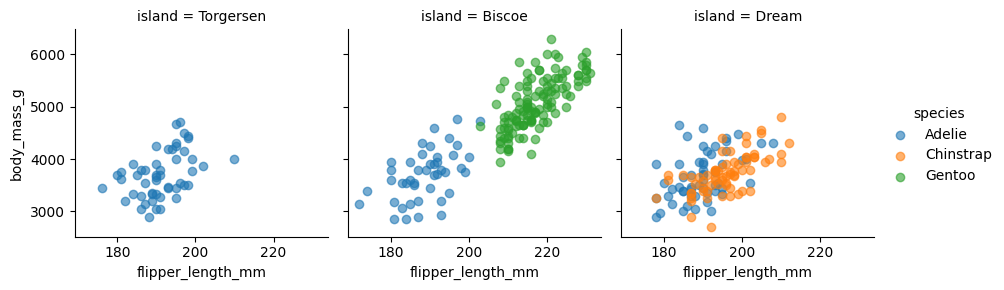

In [2]:
bird = pd.read_csv('penguins.csv')
g = sns.FacetGrid(bird, col="island", hue="species")
g.map(plt.scatter, "flipper_length_mm", "body_mass_g", alpha=.6)
g.add_legend()
plt.show()

Data set visualisation based on the above code plots the data points organised by “island” and colour-coded by “species”.

With one glance we can infer that “Gentoo” species are only present on the island “Biscoe”. Gentoo species is heavier and has a longer flipper length that other species. “Adelie” species is available on all three islands and “Chinstrap” is only available on the island “Dream”. You can see that with only 5 lines of code we can get so much information without any modelling.

I will encourage you to post a comment on other information we can deduce from the below visualisation.

Step 3: We want to quickly get an idea on the range of weights of the penguins by species and islands. Also, identify the concentration of the weight range.

With a strip plot, we can plot the weight of the penguins organised by species for each the islands.

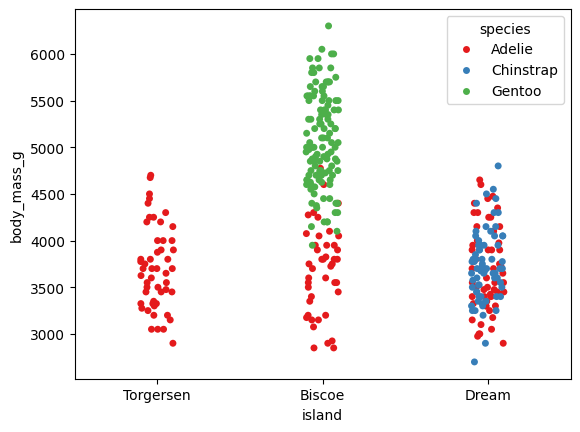

In [3]:
sns.stripplot(x="island", y="body_mass_g", hue= "species", data=bird, palette="Set1")
plt.show()

Strip plot is helpful to get an insight as long as plots are not overcrowded with densely populated data points. In the island “Dream” points are densely populated in the plot, and it is a bit difficult to get meaningful information from it.

Swarmplot can help to visualise the range of weight of the penguins by species in each of the islands non-overlapping points.

In the below code, we mention similar information like above in strip plot.

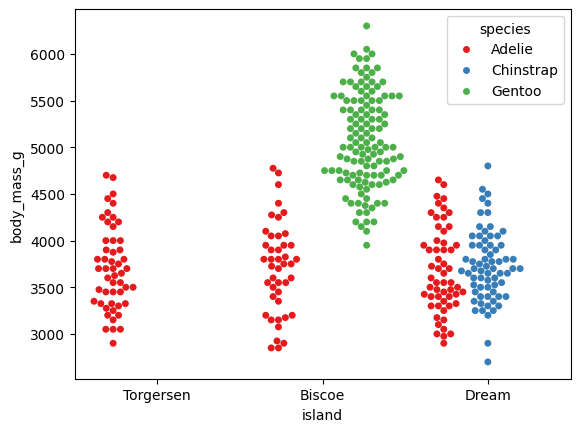

In [4]:
sns.swarmplot(x="island", y="body_mass_g", hue="species",data=bird, palette="Set1", dodge=True)
plt.show()

This improves the comprehension of the data points immensely in case of densely populated data. We can infer with a glance that “Adelie” weight ranges from approx 2500 to 4800 grams and a typical Gentoo species is heavier than Chinstrap species. I will leave you to perform other exploratory data analysis based on the below swarm plot.

Step 4: Next, we would like to understand the relationship between body mass and culmen length of penguins in each of the island based on their sex.

In the below code, in x and y parameter features between which we are interested in identifying, the relationship is mentioned. Hue is mentioned as “sex” as we want to learn the relation for male and female penguins separately.

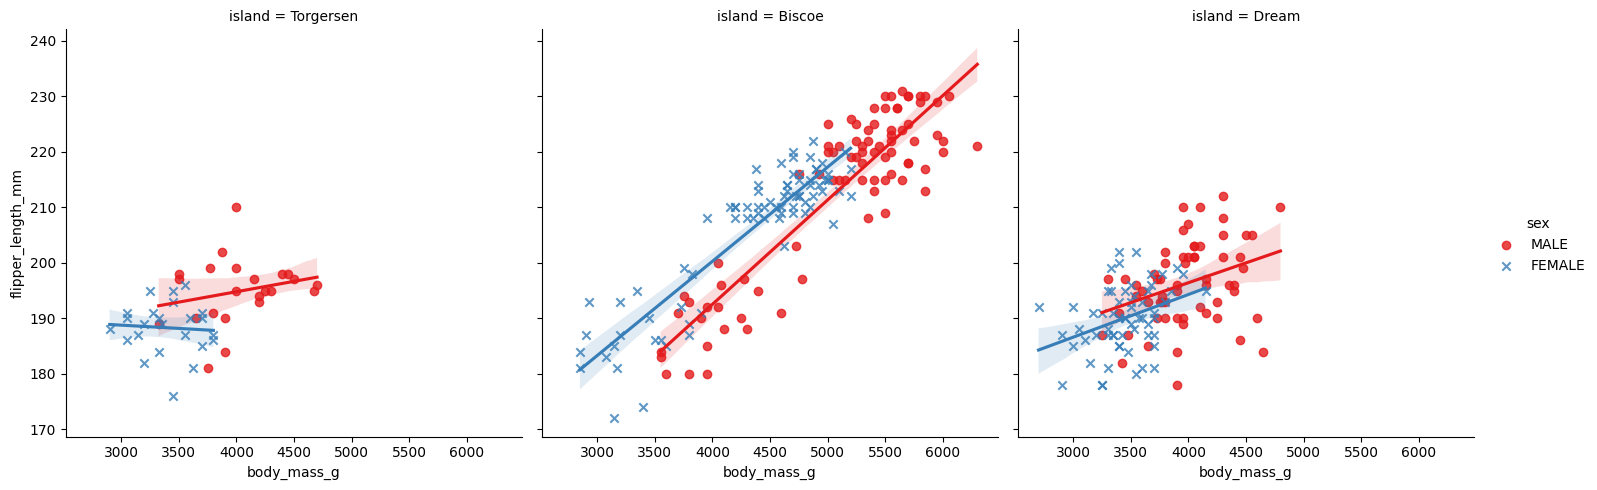

In [7]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="sex", col="island", markers=["o", "x"],palette="Set1",data=bird)
plt.show()

We can gather that body mass and culmen length relationship in Biscoe island penguins is similar for both male and female sex. On the contrary, in the island Dream, the relationship trend is quite the opposite for male and female penguins. Are the body mass and culmen length relationship of the penguins in the island Dream is linear or not linear?

We can visualise the polynomial relationship by specifying the parameter order in the lmplot method.

In the case of heavily densely populated data points, we can further extend our exploratory data analysis by visualizing the body mass culmen relationship by male and female sex separately for each island.

Visualization is organised by the col and row parameter mentioned in the code.

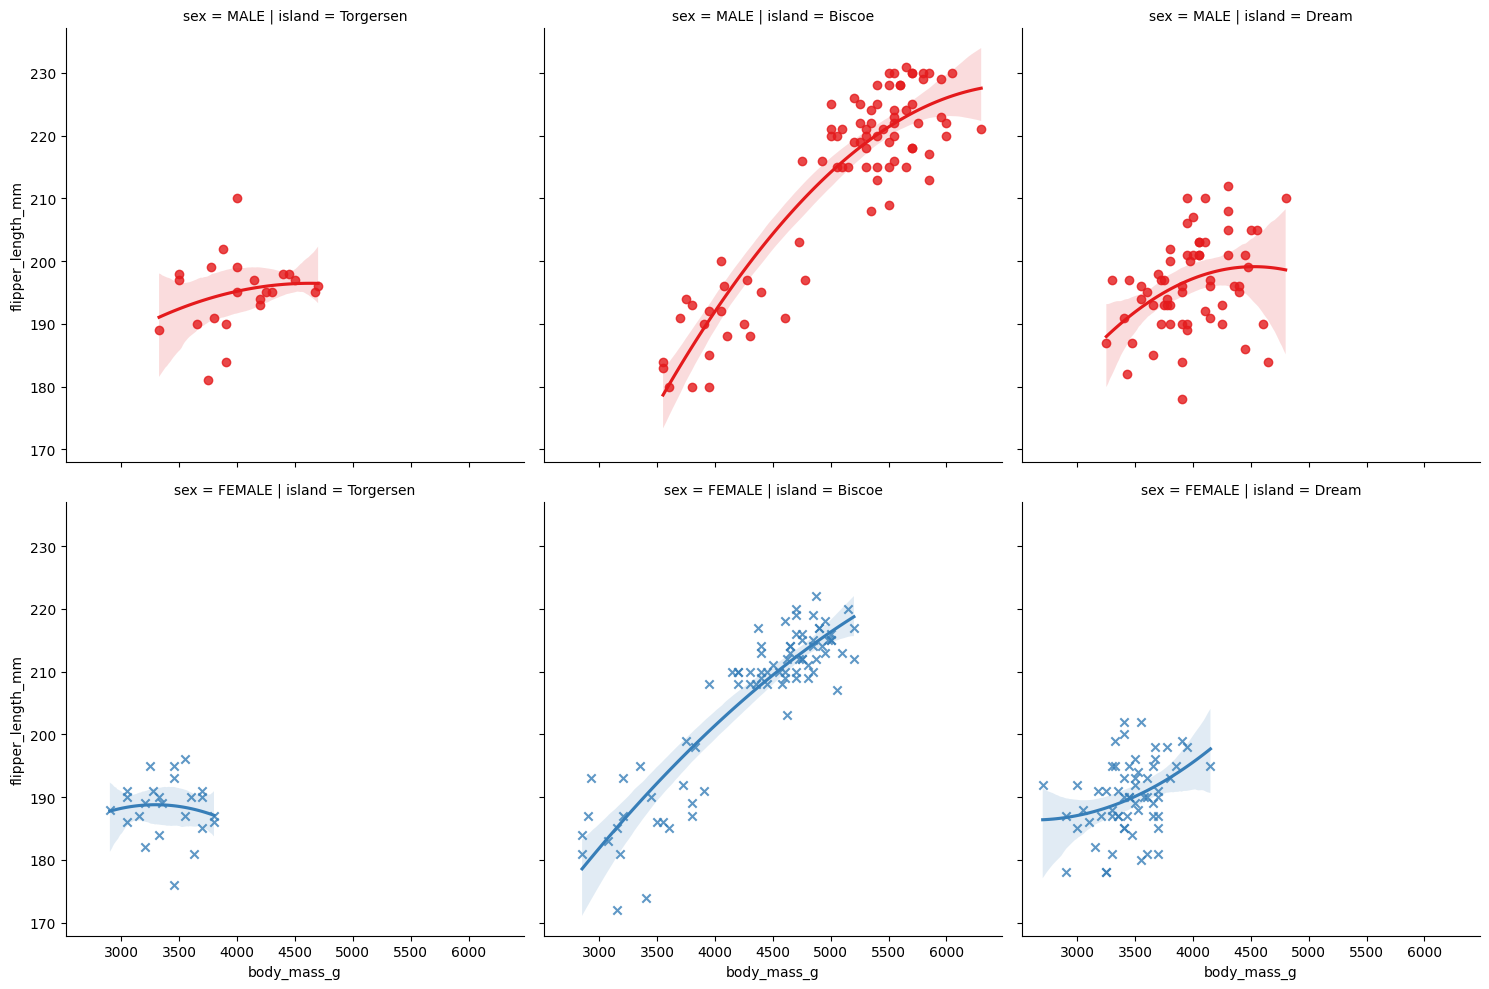

In [8]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="sex", col="island",row="sex",order=2, markers=["o", "x"],palette="Set1",data=bird)
plt.show()

Step 5: It helps to visualise a scatter plot and histogram side by side to get a holistic view of the spread of data points and also the frequency of observation at the same time. Joint plots are an efficient way to picture it. In the code below, x & y parameter is the feature between which we are trying to identify the relationship. As the data points are densely populated, hence we will plot a hexbin instead of a scatter plot. “Kind” parameter indicates the type of plot. If you want to know more about hexbin plot, then please refer my article 5 Powerful Visualisation with Pandas for Data Preprocessing.

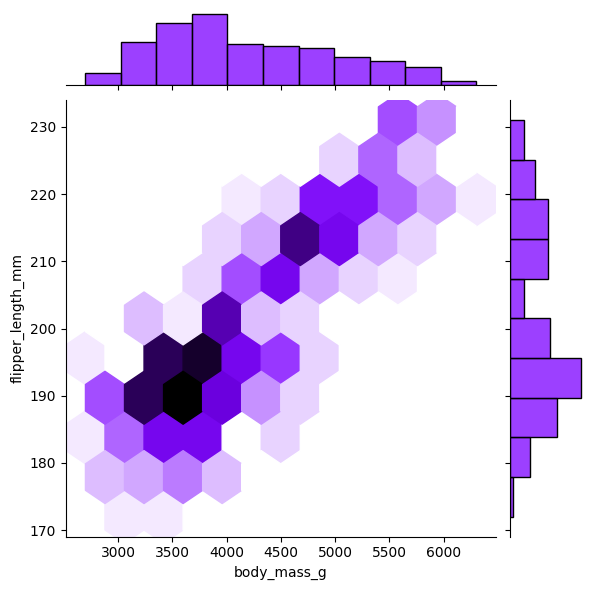

In [9]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="body_mass_g", y="flipper_length_mm", kind="hex",data=bird )
plt.show()

Based on the histogram we can infer that most numbers of penguins are between 3500 and 4500 grams. Can you deduce the most frequent culmen length range of the penguins?

We can also plot the individual data points (as shown in the right side plot) inside the hexbin plot with the code shown below.

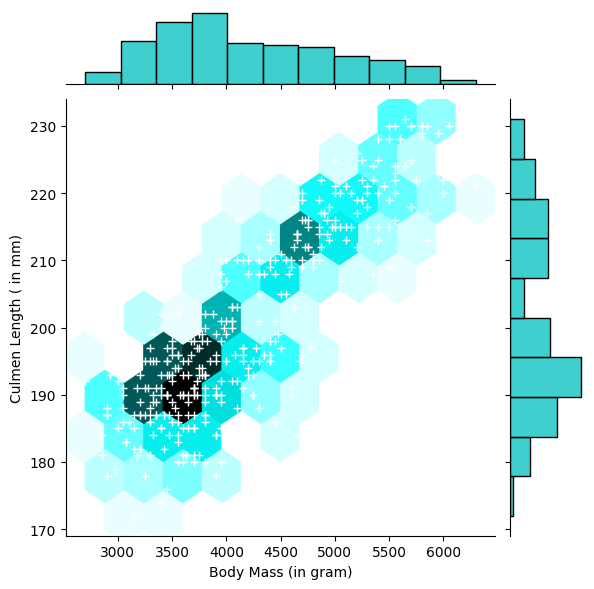

In [10]:
g = sns.jointplot(x="body_mass_g", y="flipper_length_mm", data=bird, kind="hex", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.set_axis_labels("Body Mass (in gram)", "Culmen Length ( in mm)")
plt.show()

Step 6: At last, we would like to get an overview of the spread and relationship among different features by island. Paitplots are very handy to visualise the scatter plot among different feature. The feature “island” is mentioned as the hue as we want to colour code the plot based on it.

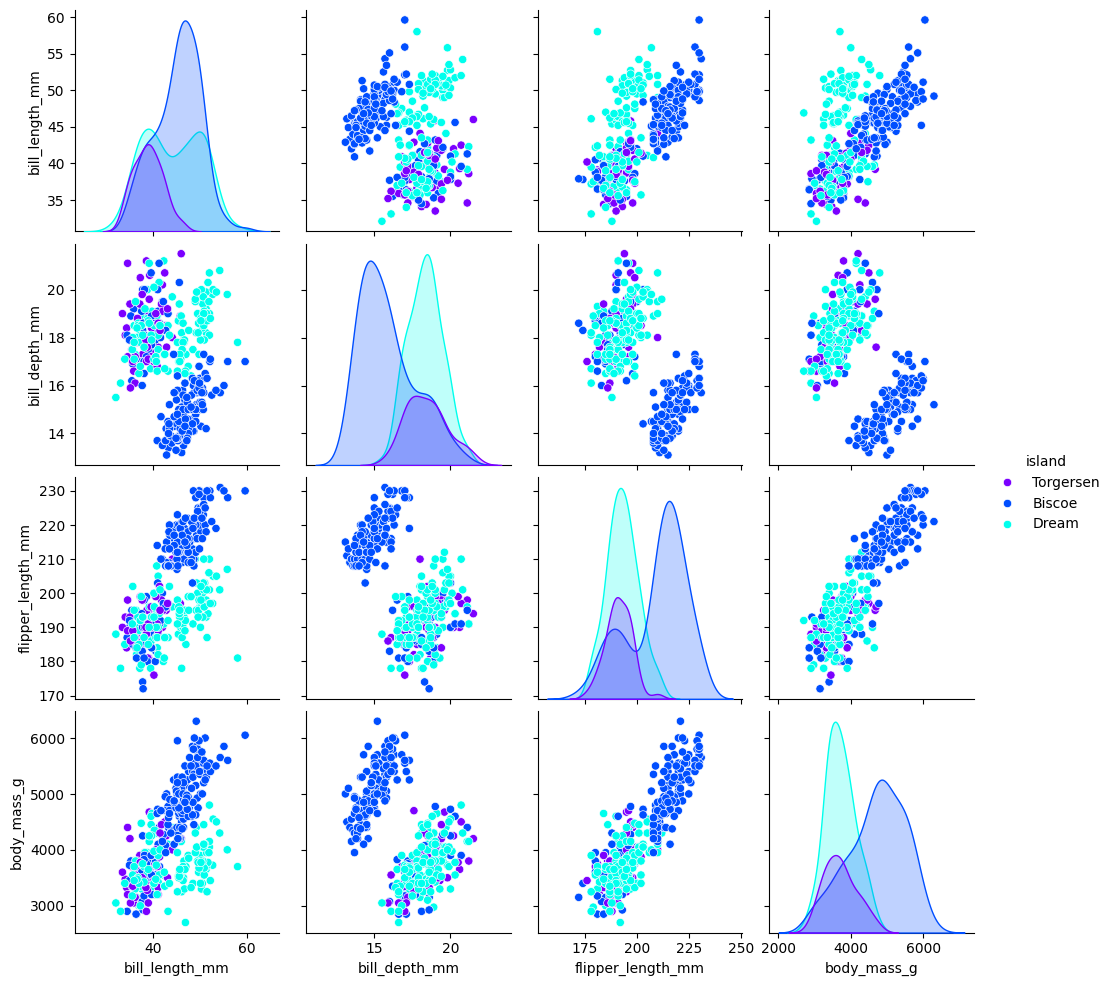

In [11]:
sns.pairplot(bird, hue="island") 
plt.show()

We can see from the visualisation that in the island Biscoe most of the penguins have shallow culmen depth but are heavier than penguins in other islands. Similarly, we can conclude that flipper length is longer for most penguins in Biscoe island but have shallow culmen depth.

In [6]:
bird.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
